<a href="https://colab.research.google.com/github/ekourkchi/incNET-data/blob/master/Resnet50_augment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import os
import subprocess
from math import *
import numpy as np
from datetime import *
from pylab import *
import matplotlib as mpl
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.pyplot as plt
from astropy.table import Table, Column 
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches
import scipy.misc as scimisc
import random
from datetime import datetime

# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!pip install imgaug

import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib


In [ ]:
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa


ia.seed(1)

seq = iaa.Sequential([

    # iaa.Sometimes(0.5, iaa.GaussianBlur(sigma=(0, 0.1))),
    # iaa.GammaContrast(gamma=(0.97,1.03)),
    # iaa.AdditiveGaussianNoise(0,3),
    iaa.Affine(rotate=(0, 360))
], random_order=True)

In [ ]:
data = np.load('/content/drive/My Drive/data_64x64.npz')
images_ = data['images'].astype(np.uint8)
labels_ = data['labels'] 
data.close() 

In [ ]:
from sklearn.model_selection import train_test_split

ix, = np.where(labels_[1]>45)

images_c = images_[ix]
labels_c = labels_[1][ix]
pgcIDs_c = labels_[0][ix]

images_train, images_test, labels_train, labels_test, pgcIDs_train,  pgcIDs_test = train_test_split(images_c, labels_c, pgcIDs_c, test_size=0.40)

notUnique = np.isin(pgcIDs_test, pgcIDs_train)
Unique = np.logical_not(notUnique)

images_train = np.concatenate((images_train, images_test[notUnique]))
labels_train  = np.concatenate((labels_train, labels_test[notUnique]))
pgcIDs_train = np.concatenate((pgcIDs_train, pgcIDs_test[notUnique]))

images_test = images_test[Unique]
labels_test = labels_test[Unique]
pgcIDs_test = pgcIDs_test[Unique]


In [ ]:
import copy 
t1 = datetime.now()

images_train_aug = copy.deepcopy(images_train)
labels_train_aug = copy.deepcopy(labels_train)
pgcIDs_train_aug = copy.deepcopy(pgcIDs_train)

images_test_aug = copy.deepcopy(images_test)
labels_test_aug = copy.deepcopy(labels_test)
pgcIDs_test_aug = copy.deepcopy(pgcIDs_test)


for i in range(20):
  
  dataAug = seq(images=images_train)
  images_train_aug = np.concatenate((images_train_aug, dataAug)) 
  labels_train_aug = np.concatenate((labels_train_aug, labels_train)) 
  pgcIDs_train_aug = np.concatenate((pgcIDs_train_aug, pgcIDs_train)) 

  dataAug = seq(images=images_test)
  images_test_aug = np.concatenate((images_test_aug, dataAug)) 
  labels_test_aug = np.concatenate((labels_test_aug, labels_test)) 
  pgcIDs_test_aug = np.concatenate((pgcIDs_test_aug, pgcIDs_test)) 


  t2 =  datetime.now()
  print("Execution time: ", i, t2-t1)

Execution time:  0 0:00:06.764193
Execution time:  1 0:00:13.583438
Execution time:  2 0:00:20.667448
Execution time:  3 0:00:27.493253
Execution time:  4 0:00:34.646953
Execution time:  5 0:00:42.365910
Execution time:  6 0:00:50.286991
Execution time:  7 0:00:57.539494
Execution time:  8 0:01:05.087839
Execution time:  9 0:01:12.552073
Execution time:  10 0:01:20.327009
Execution time:  11 0:01:28.110325
Execution time:  12 0:01:36.145122
Execution time:  13 0:01:44.134870
Execution time:  14 0:01:52.816244
Execution time:  15 0:02:01.817366
Execution time:  16 0:02:10.727789
Execution time:  17 0:02:22.320328
Execution time:  18 0:02:36.721619
Execution time:  19 0:02:52.157332


In [ ]:
print(images_train_aug.shape)
print(images_test_aug.shape)

(903504, 64, 64, 3)
(24024, 64, 64, 3)


In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras

resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(64, 64,3))

resnet.trainable = True

for layer in resnet.layers[:-4]:
    layer.trainable = False

94773248/94765736 [==============================] - 3s 0us/step


In [ ]:
import pandas as pd
layers = [(layer, layer.name, layer.trainable) for layer in resnet.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']).tail(18)

,Layer Type,Layer Name,Layer Trainable
157,<tensorflow.python.keras.layers.core.Activatio...,conv5_block2_1_relu,False
158,<tensorflow.python.keras.layers.convolutional....,conv5_block2_2_conv,False
159,<tensorflow.python.keras.layers.normalization_...,conv5_block2_2_bn,False
160,<tensorflow.python.keras.layers.core.Activatio...,conv5_block2_2_relu,False
161,<tensorflow.python.keras.layers.convolutional....,conv5_block2_3_conv,False
162,<tensorflow.python.keras.layers.normalization_...,conv5_block2_3_bn,False
163,<tensorflow.python.keras.layers.merge.Add obje...,conv5_block2_add,False
164,<tensorflow.python.keras.layers.core.Activatio...,conv5_block2_out,False
165,<tensorflow.python.keras.layers.convolutional....,conv5_block3_1_conv,False
166,<tensorflow.python.keras.layers.normalization_...,conv5_block3_1_bn,False


In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()

model.add(resnet)
# for layer in resnet.layers[:-1]: # just exclude last layer from copying
#   model.add(layer)

model.add(Flatten())
model.add(Dense(2048, activation='relu'))
# model.add(Dropout(0.20))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(32, activation='relu'))
# model.add(Dense(8, activation='relu'))

model.add(Dense(8, activation='relu'))

# output layer
model.add(Dense(1, name='fc_out1'))
model.add(Dense(1, name='fc_out2'))

# model.summary()

In [ ]:
import keras.backend as K

def custom_loss(y_true, y_pred):

    yt = K.cast(y_true, dtype='float64')
    yp = K.cast(y_pred, dtype='float64')

    # mask = K.less(y_true, 70) 

    loss = K.square(yt - yp) / (91.-yt)

    loss = K.mean(loss, -1)  

    # mse = K.sqrt(loss)
    
    # return 0.25 * mask * mse + mse

    return  K.sqrt(loss)



model.compile(loss = 'mse', optimizer='adam', metrics=['mse', 'mae'])
n_epochs = 50
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2, 2, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 2048)              16779264  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 2

In [ ]:
model_history = model.fit(images_train_aug, labels_train_aug, 
                                  epochs=n_epochs, batch_size=256, verbose=2, 
                                  validation_data=(images_test_aug, labels_test_aug),
                                  shuffle=False)

Epoch 1/50
3530/3530 - 171s - loss: 22.5562 - mse: 22.5562 - mae: 3.3317 - val_loss: 25.9249 - val_mse: 25.9249 - val_mae: 3.4308
Epoch 2/50
3530/3530 - 168s - loss: 12.6499 - mse: 12.6499 - mae: 2.7147 - val_loss: 30.9588 - val_mse: 30.9588 - val_mae: 3.9940
Epoch 3/50
3530/3530 - 168s - loss: 9.8631 - mse: 9.8631 - mae: 2.4164 - val_loss: 29.7752 - val_mse: 29.7752 - val_mae: 3.8060
Epoch 4/50
3530/3530 - 168s - loss: 7.8415 - mse: 7.8415 - mae: 2.1638 - val_loss: 28.6964 - val_mse: 28.6964 - val_mae: 3.6196
Epoch 5/50
3530/3530 - 168s - loss: 6.8963 - mse: 6.8963 - mae: 2.0430 - val_loss: 27.7957 - val_mse: 27.7957 - val_mae: 3.5070
Epoch 6/50
3530/3530 - 168s - loss: 6.2230 - mse: 6.2230 - mae: 1.9370 - val_loss: 26.0670 - val_mse: 26.0670 - val_mae: 3.3767
Epoch 7/50
3530/3530 - 168s - loss: 5.8313 - mse: 5.8313 - mae: 1.8780 - val_loss: 26.0505 - val_mse: 26.0505 - val_mae: 3.3627
Epoch 8/50
3530/3530 - 168s - loss: 5.2366 - mse: 5.2366 - mae: 1.7735 - val_loss: 25.5185 - val_mse

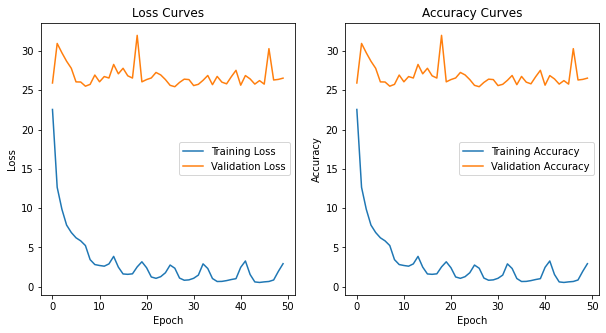

In [ ]:
def plot_model_history(history):
    '''Plot the training and validation history for a TensorFlow network'''

    # Extract loss and accuracy
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['mse']
    val_acc = history.history['val_mse']
    
    fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
    ax[0].plot(np.arange(n_epochs), loss, label='Training Loss')
    ax[0].plot(np.arange(n_epochs), val_loss, label='Validation Loss')
    ax[0].set_title('Loss Curves')
    ax[0].legend()
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')

    ax[1].plot(np.arange(n_epochs), acc, label='Training Accuracy')
    ax[1].plot(np.arange(n_epochs), val_acc, label='Validation Accuracy')
    ax[1].set_title('Accuracy Curves')
    ax[1].legend()
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    
# plot the training history
# print vgg_model.history.history['loss']

plot_model_history(model_history)
  

In [ ]:
inc_p = model.predict(images_test_aug)
inc_m = labels_test_aug


N = images_test_aug.shape[0]
inc_p = inc_p.reshape(N)

5.151999618026603
5.567641109110401


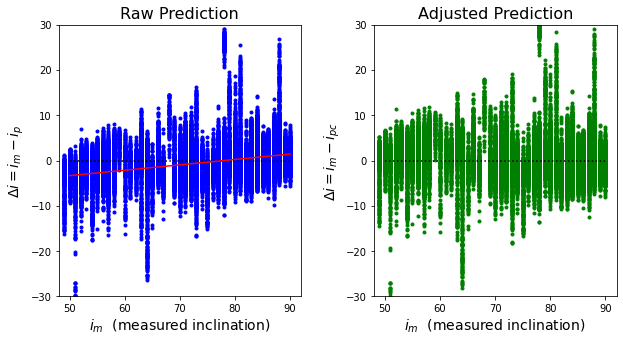

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,5)) 

d = inc_m-inc_p

m, b = np.polyfit(inc_m, d, 1)
x = np.linspace(50,90,20)
y  = m*x+b

ax[0].plot(inc_m, d, 'b.')
ax[0].plot([50,90],[0,0], 'k:')
ax[0].plot(x, y, 'r-')
ax[0].set_xlim(48,92)
ax[0].set_ylim(-30,30)
ax[0].set_title('Raw Prediction', fontsize=16)
ax[0].set_xlabel(r'$i_m$'+'  (measured inclination)', fontsize=14)
ax[0].set_ylabel(r'$\Delta i = i_m-i_p$', fontsize=14)

print(np.sqrt(np.mean((d)**2)))


d_ = inc_m-(inc_p+b)/(1.-m)
ax[1].plot(inc_m, d_, 'g.')
ax[1].plot([50,90],[0,0], 'k:')
ax[1].set_xlim(48,92)
ax[1].set_ylim(-30,30)

print(np.sqrt(np.mean((d_)**2)))
ax[1].set_title('Adjusted Prediction', fontsize=16)
ax[1].set_xlabel(r'$i_m$'+'  (measured inclination)', fontsize=14)
ax[1].set_ylabel(r'$\Delta i = i_m-i_{pc}$', fontsize=14)

plt.subplots_adjust( wspace=0.3)

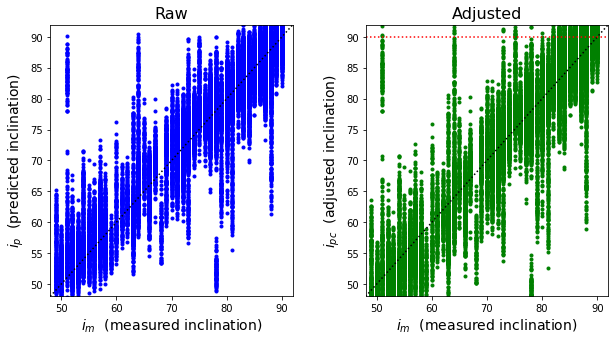

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,5)) 

ax[0].plot(inc_m, inc_p, 'b.')
ax[0].plot([48,92],[48,92], 'k:')
ax[0].set_xlim(48,92)
ax[0].set_ylim(48,92)
ax[0].set_title('Raw', fontsize=16)
ax[0].set_xlabel(r'$i_m$'+'  (measured inclination)', fontsize=14)
ax[0].set_ylabel(r'$i_p$'+'  (predicted inclination)', fontsize=14)

ax[1].plot(inc_m, (inc_p+b)/(1.-m), 'g.')
ax[1].plot([48,92],[48,92], 'k:')
ax[1].set_xlim(48,92)
ax[1].set_ylim(48,92)
ax[1].plot([48,92],[90,90], 'r:')
ax[1].set_title('Adjusted', fontsize=16)
ax[1].set_xlabel(r'$i_m$'+'  (measured inclination)', fontsize=14)
ax[1].set_ylabel(r'$i_{pc}$'+'  (adjusted inclination)', fontsize=14)

plt.subplots_adjust( wspace=0.3)